# Visuals and Statistics from the Fire Dataset


In [15]:
# import modules

import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import ttest_ind
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import random
import calendar
import matplotlib.dates as mdates

# Set a default color palette to colorblind
sns.set_palette("colorblind")
sns.set_style(style="whitegrid")

In [16]:
# Read csv into python

fire_df = pd.read_csv('clean_firedata.csv')

In [17]:
# Create counts by date month and year
date_counts = fire_df.groupby('Date').size().reset_index(name='count')
year_counts = fire_df.groupby('Year').size().reset_index(name='count')
month_counts = fire_df.groupby('Month').size().reset_index(name='count')

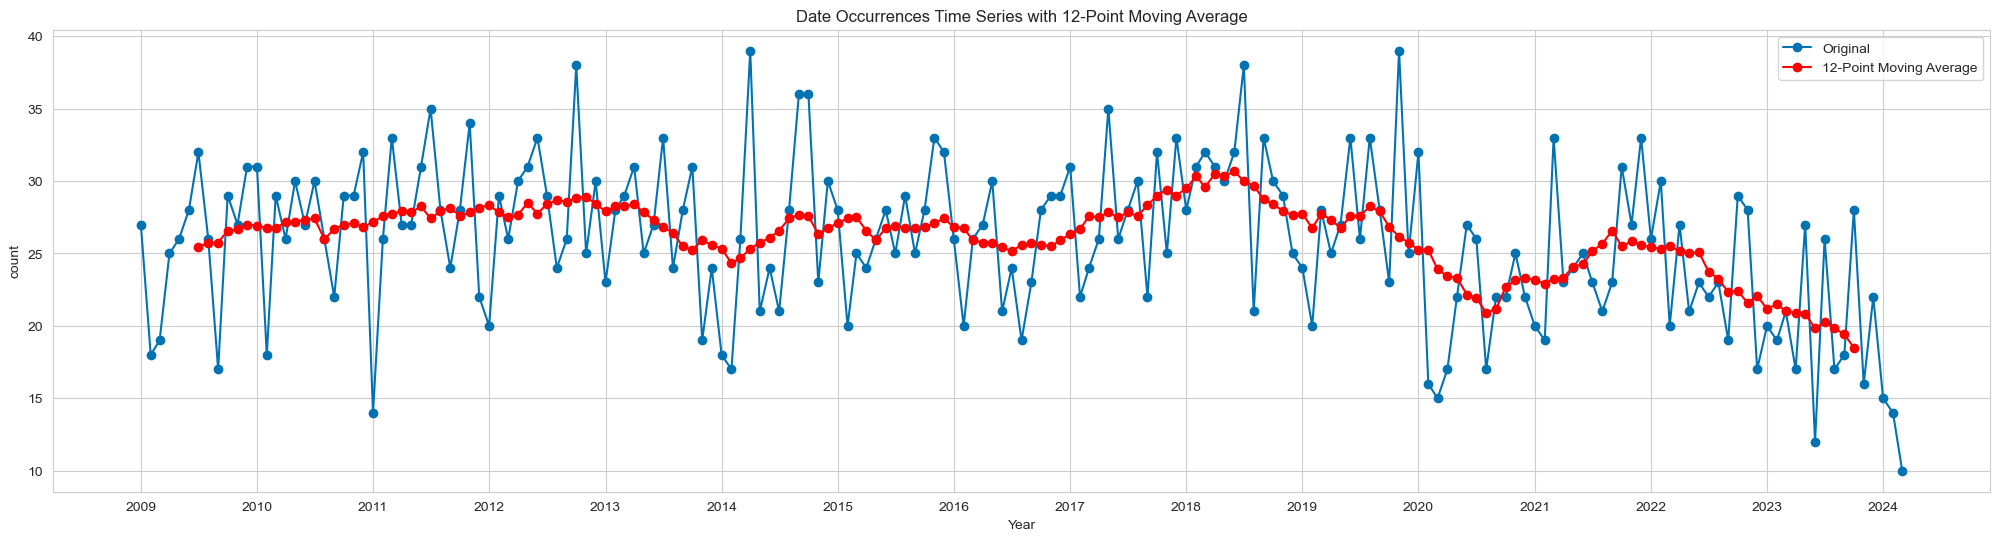

In [18]:
# Convert 'Date' column to datetime format
date_counts['Date'] = pd.to_datetime(date_counts['Date'])

# Calculate the 12-point moving average
date_counts['Moving_Average'] = date_counts['count'].rolling(window=12, center=True).mean()

# Plot the time series and the moving average
plt.figure(figsize=(25, 6))
plt.plot(date_counts['Date'], date_counts['count'], label='Original', marker='o', linestyle='-')
plt.plot(date_counts['Date'], date_counts['Moving_Average'], label='12-Point Moving Average', marker='o', linestyle='-', color='red')
plt.title('Date Occurrences Time Series with 12-Point Moving Average')
plt.xlabel('Year')
plt.ylabel('count')
plt.legend()
plt.grid(True)

# Set the major tick locator and formatter for the x-axis
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

plt.show()

The chart shows a decreasing trend in fires from 2020. Is this decrease significant?

In [19]:
# Split the data set by the year 2020
Before_2018 = fire_df[fire_df['Date'] < "2018-01-01"]
After_2018 = fire_df[fire_df['Date'] >= "2018-01-01"]

# Calculate the average number of fires per year
NumberYearsBefore = len(list(Before_2018['Year'].unique()))
NumberYearsAfter = len(list(After_2018['Year'].unique()))
TotalIncidentsBefore = len(Before_2018)
TotalIncidentsAfter = len(After_2018)
AVGIncidentsBefore = round((TotalIncidentsBefore / NumberYearsBefore),0)
AVGIncidentsAfter = round((TotalIncidentsAfter / NumberYearsAfter),0)

print(f"The number of years before 2018 is: {NumberYearsBefore}")
print(f"The total numnber of incidents before 2018 is: {TotalIncidentsBefore}")
print(f"The average number of incidents per year before 2018 is: {AVGIncidentsBefore}")
print()
print(f"The number of years after 2018 is: {NumberYearsAfter}")
print(f"The total numnber of incidents after 2018 is: {TotalIncidentsAfter}")
print(f"The average number of incidents per year after 2018 is: {AVGIncidentsAfter}")


The number of years before 2018 is: 9
The total numnber of incidents before 2018 is: 2904
The average number of incidents per year before 2018 is: 323.0

The number of years after 2018 is: 7
The total numnber of incidents after 2018 is: 1823
The average number of incidents per year after 2018 is: 260.0


In [20]:
# Convert 'Date' column to datetime format
fire_df['Date'] = pd.to_datetime(fire_df['Date'])

# Extract year-month from the 'Date' column and count the number of records for each year-month
number_of_incidents = fire_df.groupby(fire_df['Date'].dt.to_period('M')).size().reset_index(name='Number_of_Incidents')

# Rename the 'Date' column to 'Year_Month'
number_of_incidents.rename(columns={'Date': 'Year_Month'}, inplace=True)

# Split the data set by the year 2020
incidentsBefore2018 = number_of_incidents[number_of_incidents['Year_Month'] < "2018-01-01"]
incidentsAfter2018 = number_of_incidents[number_of_incidents['Year_Month'] >= "2018-01-01"]

# Set up the list of t-test 
incidents2009_2018=list(incidentsBefore2018['Number_of_Incidents'])
incidents2020_2018=list(incidentsAfter2018['Number_of_Incidents'])

# Perform the t-test
t_statistic, p_value = ttest_ind(incidents2009_2018, incidents2020_2018)

# Compare p-value to alpha to determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between the mean number of incidents.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the mean number of incidents.")
print()
# print results
print(f"The t_statistic is: {t_statistic}")
print(f"The p_value is: {p_value}")

Reject null hypothesis: There is a significant difference between the mean number of incidents.

The t_statistic is: 3.2343229235222837
The p_value is: 0.0014494488338881771


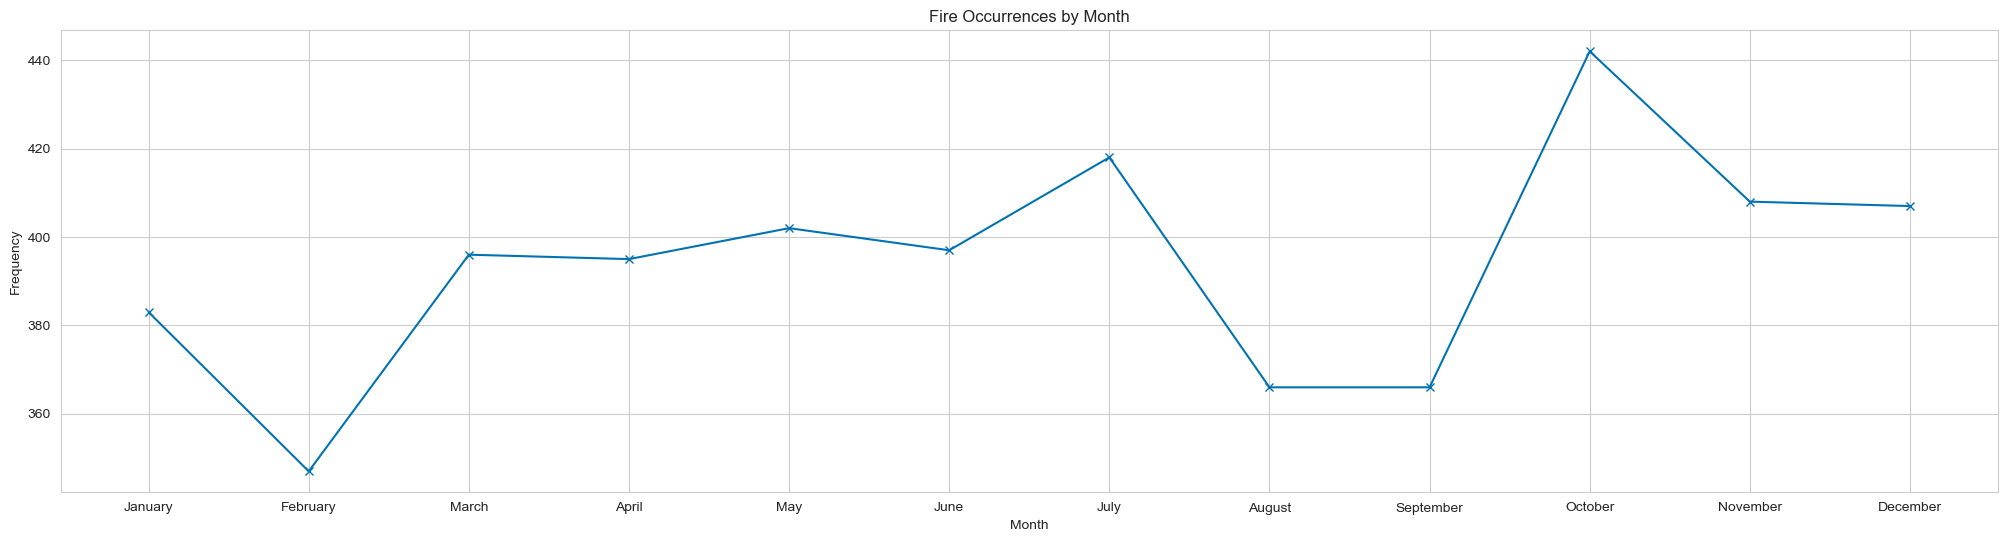

In [21]:
# Sort the months in chronological order starting with January
month_counts['Month'] = pd.Categorical(month_counts['Month'], categories=list(calendar.month_name)[1:], ordered=True)
month_counts = month_counts.sort_values(by='Month')

plt.figure(figsize=(25, 6))
plt.plot(month_counts['Month'], month_counts['count'], marker='x', linestyle='-')
plt.title('Fire Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

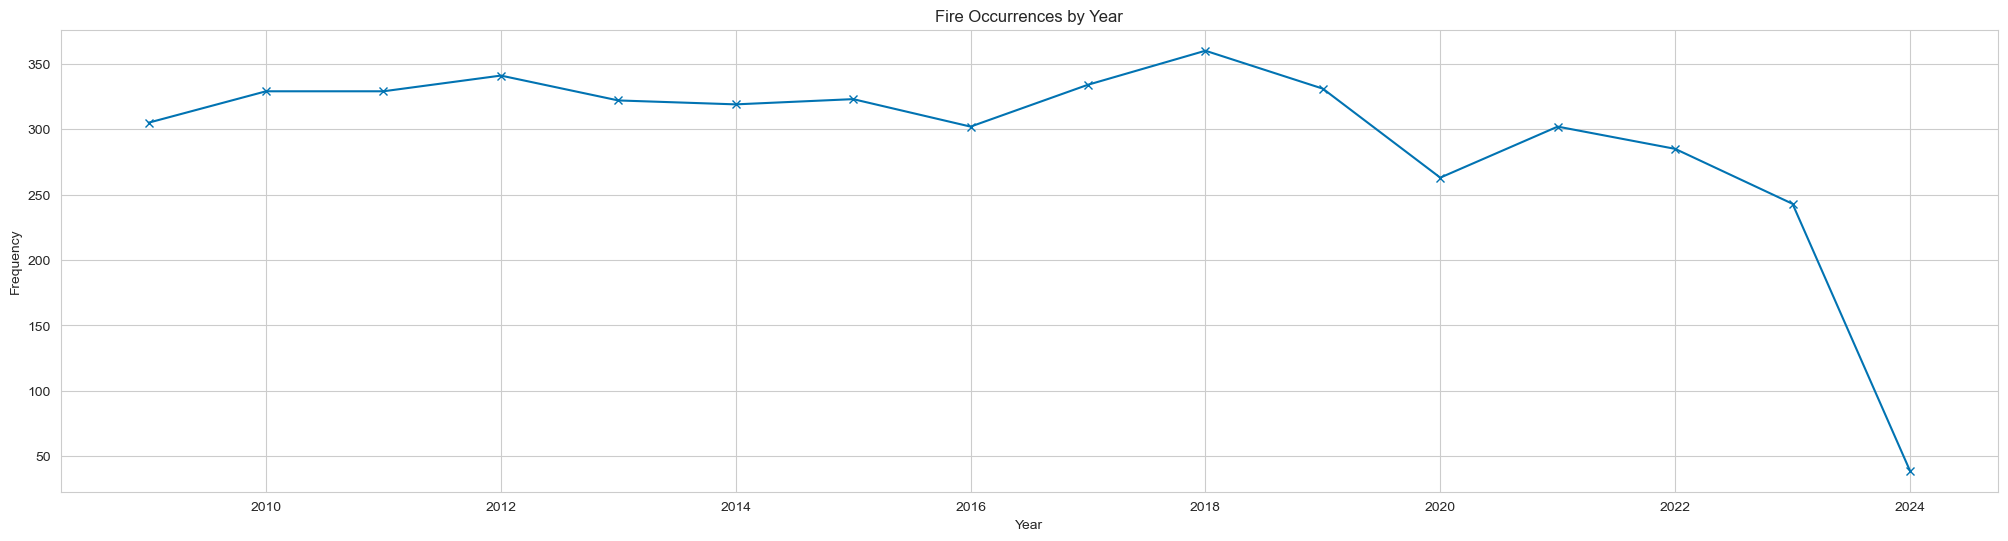

In [22]:
plt.figure(figsize=(25, 6))
plt.plot(year_counts['Year'], year_counts['count'], marker='x', linestyle='-')
plt.title('Fire Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

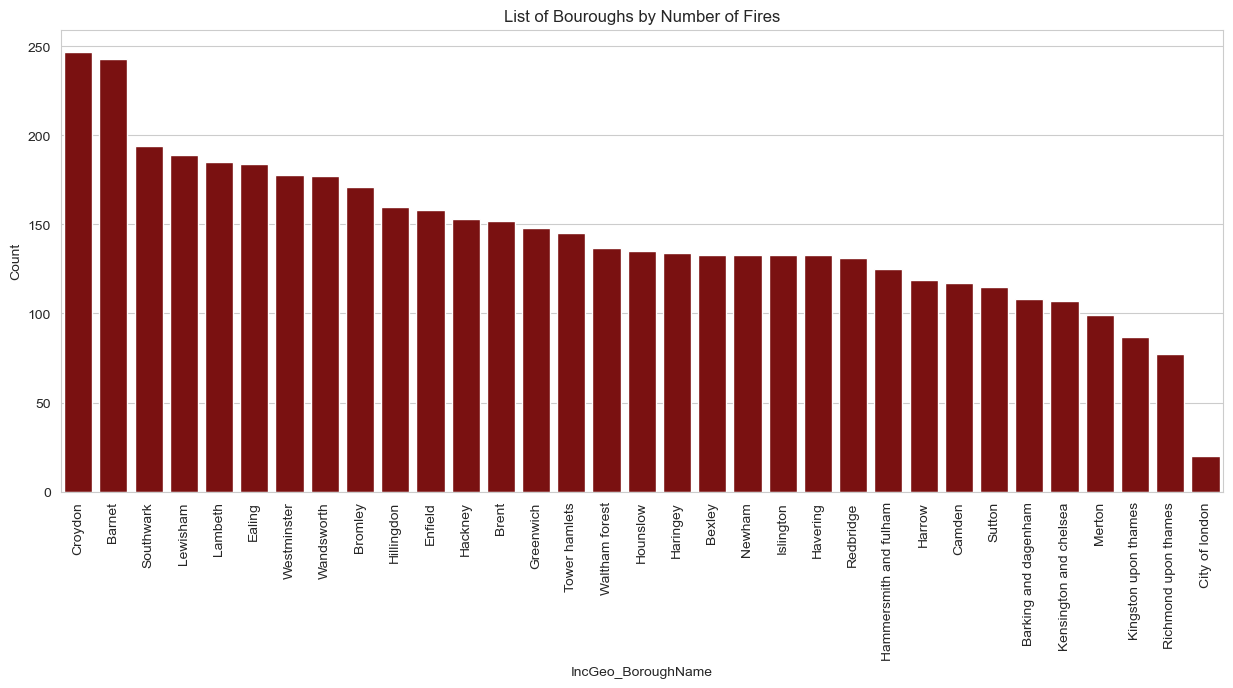

In [23]:
# Sort the DataFrame by the count of occurrences of each unique value in the 'ApplianceManufacturer' column
Ordered_df = fire_df['IncGeo_BoroughName'].value_counts().reset_index()
Ordered_df.columns = ['IncGeo_BoroughName', 'Count']
Ordered_df = Ordered_df.sort_values(by='Count', ascending=False)

# Plot the number of entries in each borough
plt.figure(figsize=(15, 6))
sns.barplot(data=Ordered_df, x='IncGeo_BoroughName', y='Count', color='darkred')
plt.xticks(rotation=90)
plt.title("List of Bouroughs by Number of Fires")
plt.show()

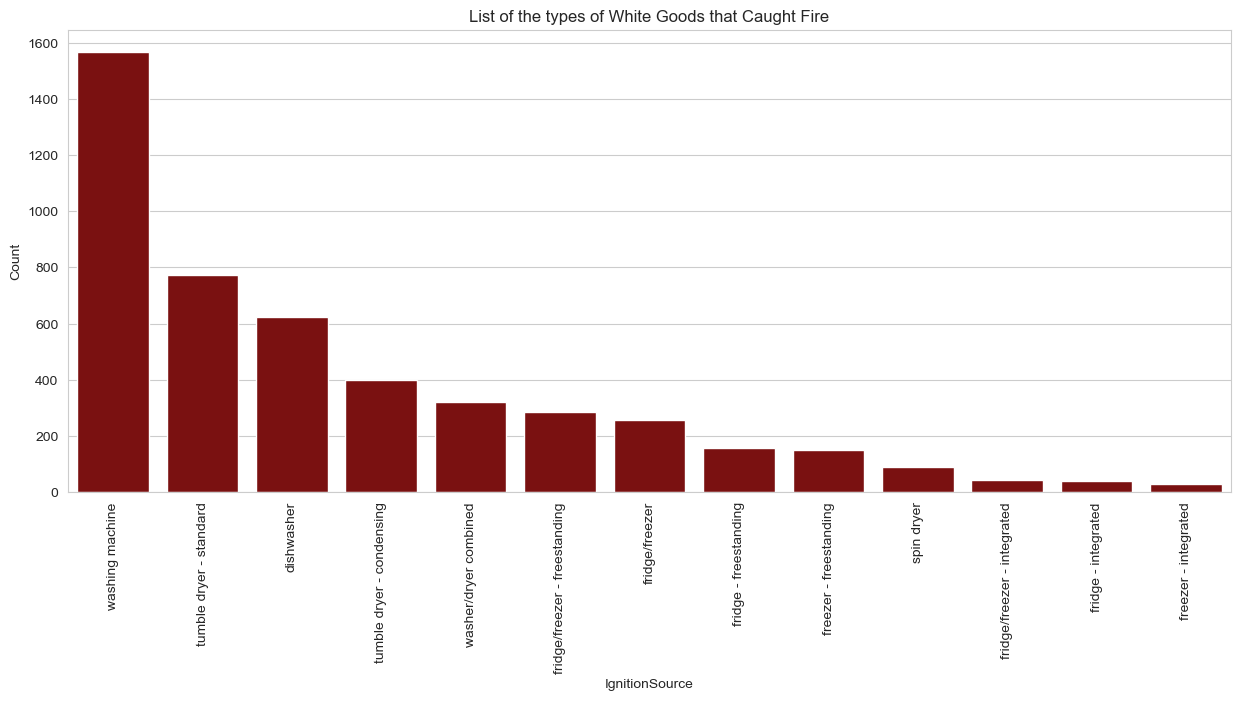

In [24]:
# Sort the DataFrame by the count of occurrences of each unique value in the 'ApplianceManufacturer' column
Ordered_df = fire_df['IgnitionSource'].value_counts().reset_index()
Ordered_df.columns = ['IgnitionSource', 'Count']
Ordered_df = Ordered_df.sort_values(by='Count', ascending=False)


# Plot the number of entries in each borough
plt.figure(figsize=(15, 6))
sns.barplot(data=Ordered_df, x='IgnitionSource', y='Count',color='darkred')
plt.xticks(rotation=90)
plt.title("List of the types of White Goods that Caught Fire")
plt.show()

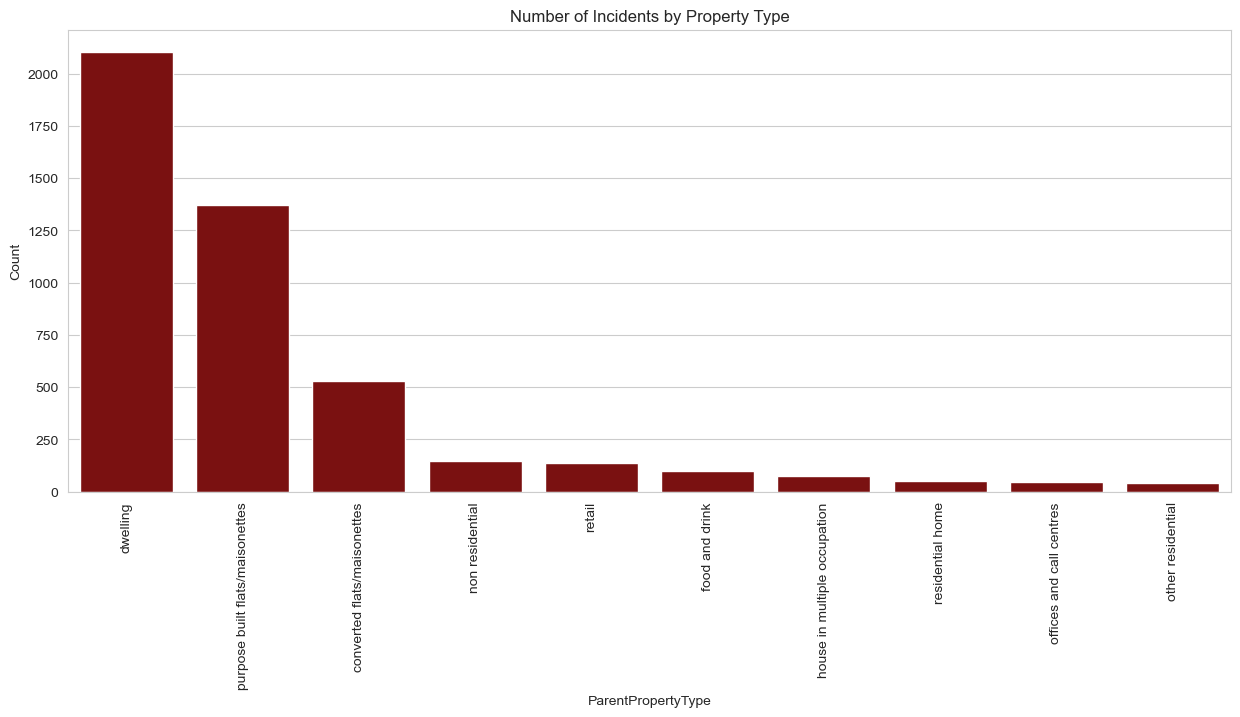

In [25]:
# Sort the DataFrame by the count of occurrences of each unique value in the 'ApplianceManufacturer' column
Ordered_df = fire_df['ParentPropertyType'].value_counts().reset_index()
Ordered_df.columns = ['ParentPropertyType', 'Count']
Ordered_df = Ordered_df.sort_values(by='Count', ascending=False)

# Select only the top ten rows
Ordered_df_top10 = Ordered_df.head(10)

# Plot of the item first ignited source 

plt.figure(figsize=(15, 6))

sns.barplot(data=Ordered_df_top10, x='ParentPropertyType', y='Count', color='darkred')
plt.xticks(rotation=90)
plt.title("Number of Incidents by Property Type")
plt.show()

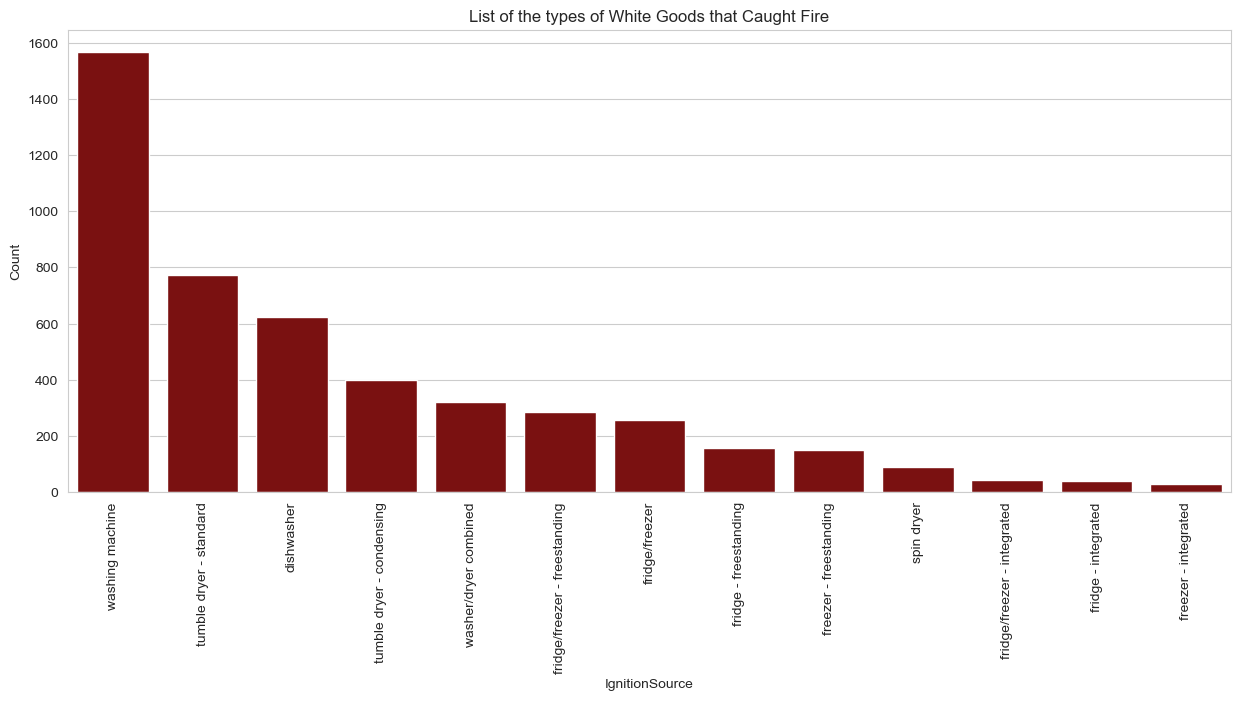

In [26]:
# Sort the DataFrame by the count of occurrences of each unique value in the 'ApplianceManufacturer' column
Ordered_df = fire_df['IgnitionSource'].value_counts().reset_index()
Ordered_df.columns = ['IgnitionSource', 'Count']
Ordered_df = Ordered_df.sort_values(by='Count', ascending=False)


# Plot the number of entries in each borough
plt.figure(figsize=(15, 6))
sns.barplot(data=Ordered_df, x='IgnitionSource', y='Count',color='darkred')
plt.xticks(rotation=90)
plt.title("List of the types of White Goods that Caught Fire")
plt.show()

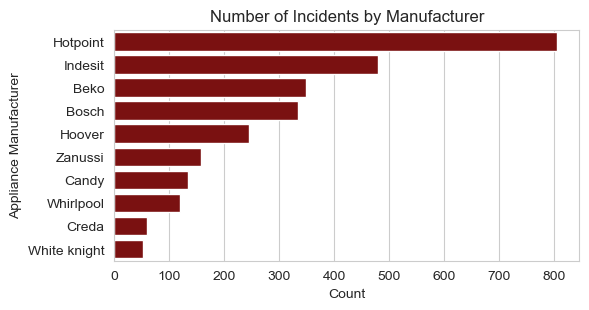

In [27]:
# Sort the DataFrame by the count of occurrences of each unique value in the 'ApplianceManufacturer' column
Ordered_df = fire_df['ApplianceManufacturer'].value_counts().reset_index()
Ordered_df.columns = ['ApplianceManufacturer', 'Count']
Ordered_df = Ordered_df.sort_values(by='Count', ascending=False)

# 
Cropped_Ordered_df=Ordered_df.head(10)

plt.figure(figsize=(6, 3))  # Adjust the figure size according to your preference

# Plot the sorted count data
sns.barplot(data=Cropped_Ordered_df, y='ApplianceManufacturer', x='Count', color='darkred')
plt.title("Number of Incidents by Manufacturer")
plt.xlabel("Count")
plt.ylabel("Appliance Manufacturer")
plt.show()

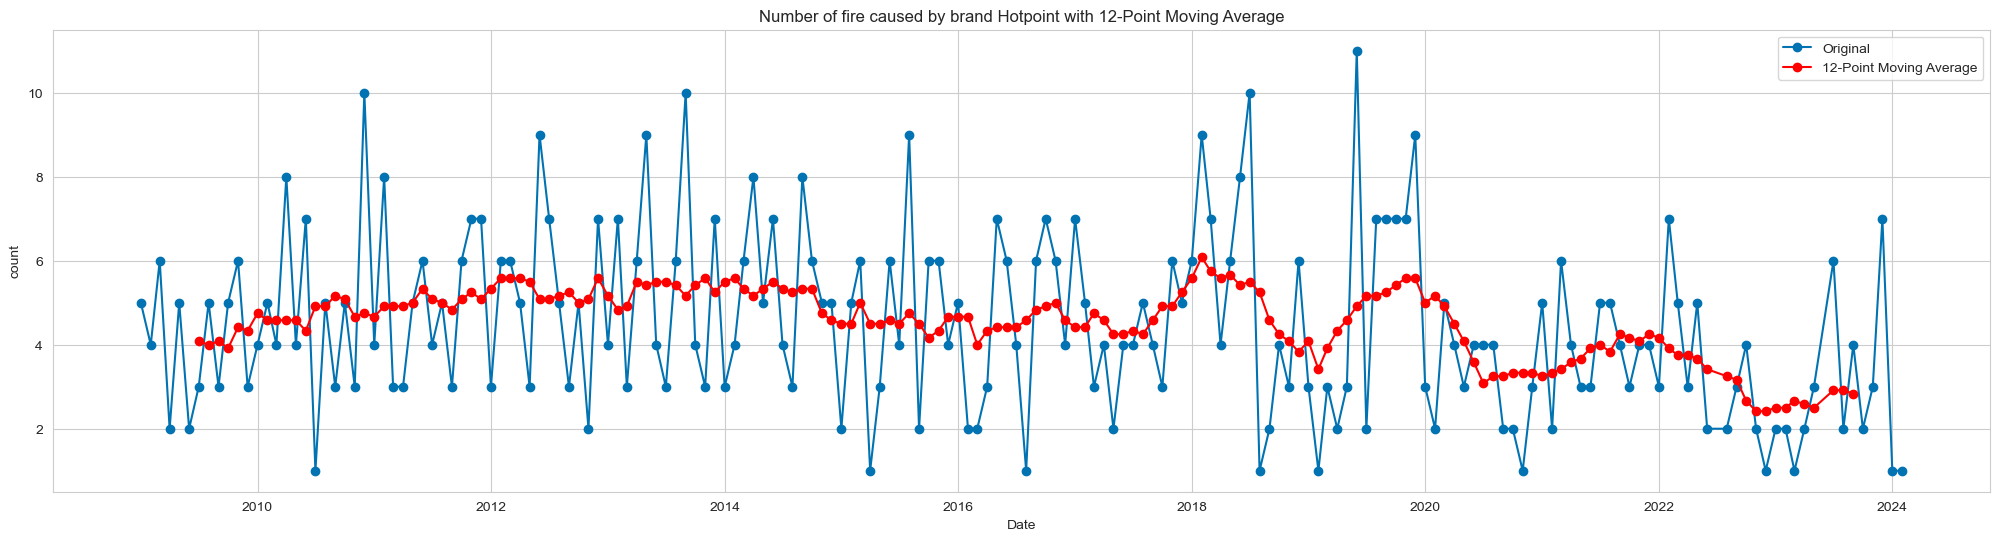

In [28]:
# Reduce the dataset to just hotpoint
Hotpoint_df = fire_df[fire_df['ApplianceManufacturer']=='Hotpoint']

# Create df of counts for each Date
HP_date_counts = Hotpoint_df.groupby('Date').size().reset_index(name='count')

# Calculate the 12-point moving average
HP_date_counts['Moving_Average'] = HP_date_counts['count'].rolling(window=12, center=True).mean()

# Plot the time series and the moving average
plt.figure(figsize=(25, 6))
plt.plot(HP_date_counts['Date'], HP_date_counts['count'], label='Original', marker='o', linestyle='-')
plt.plot(HP_date_counts['Date'], HP_date_counts['Moving_Average'], label='12-Point Moving Average', marker='o', linestyle='-', color='red')
plt.title('Number of fire caused by brand Hotpoint with 12-Point Moving Average')
plt.xlabel('Date')
plt.ylabel('count')
plt.legend()
plt.grid(True)
plt.show()